*****Mini projet elaboré par Sarra Mohsen & Siwar Hrigua*****


In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


### 1. Collecte des données :


a. Charger les données : un fichier CSV contenant les informations nécessaires pour les traitements demandées

In [122]:
#Charger le fichier CSV avec le bon encodage
file_path = 'Data/Composite_measure_of_access_to_financial_services.csv'
data = pd.read_csv(file_path, encoding='ISO-8859-1')
#Afficher le DataFrame nettoyé.
print(data)

                      Unnamed: 0 Unnamed: 1  Percent with access Unnamed: 3  \
0                      Albania                                34        NaN   
1                      Algeria                                31        NaN   
2                       Angola                                25        NaN   
3          Antigua and Barbuda                                48        NaN   
4                    Argentina                                28        NaN   
5                      Armenia          s                      9        NaN   
6                      Austria          s                     96        NaN   
7                   Azerbaijan                                17        NaN   
8                 Bahamas, The                                53        NaN   
9                   Bangladesh                                32        NaN   
10                    Barbados                                56        NaN   
11                     Belarus                      

In [123]:
#Conserver uniquement les trois premières colonnes
data = data.iloc[:, :3]
print(data.columns)
#Renommer les colonnes
data.columns = ['Country', 'is Survey Based ?', 'Percent with Access']
#Supprimer les espaces au début et à la fin, et remplacer les chaînes vides par NaN.
data['is Survey Based ?'] = data['is Survey Based ?'].str.strip().replace('', np.nan)
#Remplir les valeurs NaN avec 'No' et remplace 's' par 'Yes'.
data['is Survey Based ?'] = data['is Survey Based ?'].fillna('No') 
data['is Survey Based ?'] = data['is Survey Based ?'].replace('s', 'Yes') 
#Convertir en DataFrame et afficher le DataFrame nettoyé
df_access_finance = pd.DataFrame(data)
#Afficher toutes les lignes
pd.set_option('display.max_rows', None)
df_access_finance

Index(['Unnamed: 0', 'Unnamed: 1', 'Percent with access'], dtype='object')


,Country,is Survey Based ?,Percent with Access
0,Albania,No,34
1,Algeria,No,31
2,Angola,No,25
3,Antigua and Barbuda,No,48
4,Argentina,No,28
5,Armenia,Yes,9
6,Austria,Yes,96
7,Azerbaijan,No,17
8,"Bahamas, The",No,53
9,Bangladesh,No,32


In [124]:
#Charger le fichier CSV avec le bon encodage
file_path = 'Data/Use_of_loan_and_deposit_services_across_economies.csv'
dataLoan = pd.read_csv(file_path, encoding='ISO-8859-1')
#Afficher le DataFrame nettoyé
dataLoan

,Country,Loan accounts per capita (number),Loan-income ratio,Deposit accounts per capita (number),Deposit-income ratio,Ratio of private credit to GDP (average 1999 to 2003),GDP per capita 2003 ($)
0,Albania,4.42,15.41,161.25,2.75,,"1,933"
1,Argentina,154.19,1.77,368.73,0.58,0.205,"3,381"
2,Armenia,41.23,1.93,111.38,1,0.076,915
3,Austria,647.64,1.84,"3,119.95",0.26,1.025,"31,202"
4,Bangladesh,54.73,5.22,228.75,1.6,0.245,376
5,Belgium,59.47,21.09,"3,080.31",0.38,0.773,"29,205"
6,Bolivia,9.53,27.89,40.63,5.81,0.558,894
7,Bosnia and Herzegovina,114.09,3.19,429.4,1.87,,"1,682"
8,Brazil,49.59,6.18,630.86,0.4,0.346,"2,788"
9,Bulgaria,73.85,4.24,"1,351.37",0.26,0.149,"2,538"


### 2. Analyse Exploratoire des données :

a. Nettoyer les données : détecter les valeurs manquantes, les anomalies, etc.

In [125]:
#Afficher les colonnes
print(dataLoan.columns)
#Supprimer les espaces supplémentaires dans les noms des colonnes
dataLoan.columns = dataLoan.columns.str.strip()
for column in dataLoan.columns[1:]:  # Skip the first column
    #Supprimer les valeurs non numériques et remplace-les par des chaînes vides ('')
    dataLoan[column] = dataLoan[column].replace(r'[^\d.]', '', regex=True)
    #Convertir la colonne en numérique, en forçant les erreurs à devenir NaN
    dataLoan[column] = pd.to_numeric(dataLoan[column], errors='coerce')
    #Remplir les valeurs NaN avec la médiane de la colonne
    dataLoan[column] = dataLoan[column].fillna(dataLoan[column].median())
dataLoan

Index(['Country', 'Loan accounts per capita (number)   ',
       'Loan-income ratio   ', ' Deposit accounts per capita (number)',
       ' Deposit-income ratio   ',
       ' Ratio of private credit to GDP (average 1999 to 2003) ',
       'GDP per capita 2003 ($)  '],
      dtype='object')


,Country,Loan accounts per capita (number),Loan-income ratio,Deposit accounts per capita (number),Deposit-income ratio,Ratio of private credit to GDP (average 1999 to 2003),GDP per capita 2003 ($)
0,Albania,4.420,15.410,161.250,2.750,0.388,1933
1,Argentina,154.190,1.770,368.730,0.580,0.205,3381
2,Armenia,41.230,1.930,111.380,1.000,0.076,915
3,Austria,647.640,1.840,3119.950,0.260,1.025,31202
4,Bangladesh,54.730,5.220,228.750,1.600,0.245,376
5,Belgium,59.470,21.090,3080.310,0.380,0.773,29205
6,Bolivia,9.530,27.890,40.630,5.810,0.558,894
7,Bosnia and Herzegovina,114.090,3.190,429.400,1.870,0.388,1682
8,Brazil,49.590,6.180,630.860,0.400,0.346,2788
9,Bulgaria,73.850,4.240,1351.370,0.260,0.149,2538


In [126]:
#Effectuer la fusion des DataFrames en utilisant la colonne 'Country' comme clé.
merged_df  = pd.merge(df_access_finance, dataLoan, on='Country')

In [127]:
merged_df

,Country,is Survey Based ?,Percent with Access,Loan accounts per capita (number),Loan-income ratio,Deposit accounts per capita (number),Deposit-income ratio,Ratio of private credit to GDP (average 1999 to 2003),GDP per capita 2003 ($)
0,Albania,No,34,4.420,15.410,161.250,2.750,0.388,1933
1,Argentina,No,28,154.190,1.770,368.730,0.580,0.205,3381
2,Armenia,Yes,9,41.230,1.930,111.380,1.000,0.076,915
3,Austria,Yes,96,647.640,1.840,3119.950,0.260,1.025,31202
4,Bangladesh,No,32,54.730,5.220,228.750,1.600,0.245,376
5,Belgium,Yes,97,59.470,21.090,3080.310,0.380,0.773,29205
6,Bolivia,No,30,9.530,27.890,40.630,5.810,0.558,894
7,Bosnia and Herzegovina,No,17,114.090,3.190,429.400,1.870,0.388,1682
8,Brazil,Yes,43,49.590,6.180,630.860,0.400,0.346,2788
9,Bulgaria,Yes,56,73.850,4.240,1351.370,0.260,0.149,2538


b. Effectuer des opérations de base sur les données en utilisant la
librairie Pandas (filtrage, tri, groupby, etc.).

In [128]:
#Filtrage des Données
#Convertir la colonne en numérique, forcer les erreurs à NaN si des valeurs non convertibles sont rencontrées
filtregdp = pd.DataFrame(dataLoan)
filtregdp['GDP per capita 2003 ($)'] = pd.to_numeric(filtregdp['GDP per capita 2003 ($)'], errors='coerce')
#Filtrer le DataFrame pour les pays avec un PIB par habitant supérieur à 5000$
filtregdp = filtregdp[filtregdp['GDP per capita 2003 ($)'] < 5000]
filtregdp

,Country,Loan accounts per capita (number),Loan-income ratio,Deposit accounts per capita (number),Deposit-income ratio,Ratio of private credit to GDP (average 1999 to 2003),GDP per capita 2003 ($)
0,Albania,4.420,15.410,161.250,2.750,0.388,1933
1,Argentina,154.190,1.770,368.730,0.580,0.205,3381
2,Armenia,41.230,1.930,111.380,1.000,0.076,915
4,Bangladesh,54.730,5.220,228.750,1.600,0.245,376
6,Bolivia,9.530,27.890,40.630,5.810,0.558,894
7,Bosnia and Herzegovina,114.090,3.190,429.400,1.870,0.388,1682
8,Brazil,49.590,6.180,630.860,0.400,0.346,2788
9,Bulgaria,73.850,4.240,1351.370,0.260,0.149,2538
10,Chile,417.740,1.600,1044.820,0.460,0.694,4591
11,Colombia,80.565,3.745,612.210,0.420,0.262,1747


In [129]:
#Filtrer les pays avec un ratio crédit privé/PIB entre 0.1 et 1
filtered_credit_to_gdp = dataLoan[(dataLoan['Ratio of private credit to GDP (average 1999 to 2003)'] >= 0.1) & 
                    (dataLoan['Ratio of private credit to GDP (average 1999 to 2003)'] <= 1)]
filtered_credit_to_gdp


,Country,Loan accounts per capita (number),Loan-income ratio,Deposit accounts per capita (number),Deposit-income ratio,Ratio of private credit to GDP (average 1999 to 2003),GDP per capita 2003 ($)
0,Albania,4.420,15.410,161.250,2.750,0.388,1933
1,Argentina,154.190,1.770,368.730,0.580,0.205,3381
4,Bangladesh,54.730,5.220,228.750,1.600,0.245,376
5,Belgium,59.470,21.090,3080.310,0.380,0.773,29205
6,Bolivia,9.530,27.890,40.630,5.810,0.558,894
7,Bosnia and Herzegovina,114.090,3.190,429.400,1.870,0.388,1682
8,Brazil,49.590,6.180,630.860,0.400,0.346,2788
9,Bulgaria,73.850,4.240,1351.370,0.260,0.149,2538
10,Chile,417.740,1.600,1044.820,0.460,0.694,4591
11,Colombia,80.565,3.745,612.210,0.420,0.262,1747


In [130]:
#Tri des Données
#Trier par PIB par habitant(GDP per capita 2003 ($)) décroissant :
dataLoan.sort_values(by='GDP per capita 2003 ($)', ascending=False)

,Country,Loan accounts per capita (number),Loan-income ratio,Deposit accounts per capita (number),Deposit-income ratio,Ratio of private credit to GDP (average 1999 to 2003),GDP per capita 2003 ($)
37,Norway,80.565,3.745,1610.780,0.230,0.870,48592
49,Switzerland,80.565,3.745,1985.840,0.290,1.589,42138
13,Denmark,450.990,2.090,2706.070,0.220,1.100,39429
3,Austria,647.640,1.840,3119.950,0.260,1.025,31202
18,France,80.565,3.745,1800.840,0.400,0.857,29267
5,Belgium,59.470,21.090,3080.310,0.380,0.773,29205
25,Italy,328.150,2.350,975.640,0.470,0.750,25429
47,Singapore,513.230,3.840,1670.880,1.620,1.159,21492
48,Spain,556.480,1.910,2075.960,0.440,0.992,20343
24,Israel,709.900,1.580,528.885,0.655,0.859,16686


c. Calculer des statistiques descriptives sur les données avec Numpy
(moyennes, médianes, écarts types, etc.)

In [131]:
#Statistiques simples
#Trouver le maximum, minimum ou moyenne du "Loan accounts per capita (number)".
print("Nombre de comptes de prêt par habitant maximum :", merged_df['Loan accounts per capita (number)'].max())
print("Nombre de comptes de prêt par habitant minimum :", merged_df['Loan accounts per capita (number)'].min())
print("Nombre de comptes de prêt par habitant moyenne :", merged_df['Loan accounts per capita (number)'].mean())
print("Nombre de comptes de prêt par habitant écart type :", merged_df['Loan accounts per capita (number)'].std())


Nombre de comptes de prêt par habitant maximum : 776.48
Nombre de comptes de prêt par habitant minimum : 4.38
Nombre de comptes de prêt par habitant moyenne : 187.04720930232554
Nombre de comptes de prêt par habitant écart type : 210.58770187575604


In [132]:
# Afficher les statistiques descriptives
descriptive_stats = merged_df.describe()
descriptive_stats

,Percent with Access,Loan accounts per capita (number),Loan-income ratio,Deposit accounts per capita (number),Deposit-income ratio,Ratio of private credit to GDP (average 1999 to 2003),GDP per capita 2003 ($)
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,47.651163,187.047209,5.539535,958.401860,1.440698,0.482140,6656.976744
std,28.185511,210.587702,5.806917,902.897851,1.836388,0.348818,9437.312323
min,5.000000,4.380000,0.330000,14.460000,0.040000,0.047000,245.000000
25%,27.000000,52.130000,2.220000,270.630000,0.430000,0.225000,1770.000000
50%,39.000000,80.565000,3.745000,486.740000,0.680000,0.388000,2696.000000
75%,67.500000,281.175000,6.155000,1504.555000,1.610000,0.707500,5380.000000
max,99.000000,776.480000,27.890000,3119.950000,9.310000,1.352000,39429.000000


d. Comparer l'accès au crédit et les comptes de prêts.

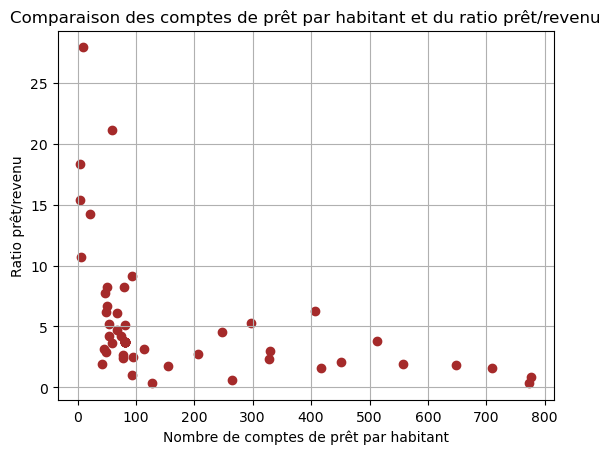

In [133]:
#Comparer le nombre de comptes de prêts et le ratio prêt/revenu
plt.scatter(dataLoan['Loan accounts per capita (number)'], dataLoan['Loan-income ratio'], color='brown')
plt.title("Comparaison des comptes de prêt par habitant et du ratio prêt/revenu")
plt.xlabel("Nombre de comptes de prêt par habitant")
plt.ylabel("Ratio prêt/revenu")
plt.grid(True)
plt.show()


In [134]:
merged_df

,Country,is Survey Based ?,Percent with Access,Loan accounts per capita (number),Loan-income ratio,Deposit accounts per capita (number),Deposit-income ratio,Ratio of private credit to GDP (average 1999 to 2003),GDP per capita 2003 ($)
0,Albania,No,34,4.420,15.410,161.250,2.750,0.388,1933
1,Argentina,No,28,154.190,1.770,368.730,0.580,0.205,3381
2,Armenia,Yes,9,41.230,1.930,111.380,1.000,0.076,915
3,Austria,Yes,96,647.640,1.840,3119.950,0.260,1.025,31202
4,Bangladesh,No,32,54.730,5.220,228.750,1.600,0.245,376
5,Belgium,Yes,97,59.470,21.090,3080.310,0.380,0.773,29205
6,Bolivia,No,30,9.530,27.890,40.630,5.810,0.558,894
7,Bosnia and Herzegovina,No,17,114.090,3.190,429.400,1.870,0.388,1682
8,Brazil,Yes,43,49.590,6.180,630.860,0.400,0.346,2788
9,Bulgaria,Yes,56,73.850,4.240,1351.370,0.260,0.149,2538


e. Créer des graphiques pertinents à l'aide de Matplotlib et Seaborn.

C:\Users\Razer_Dazer\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


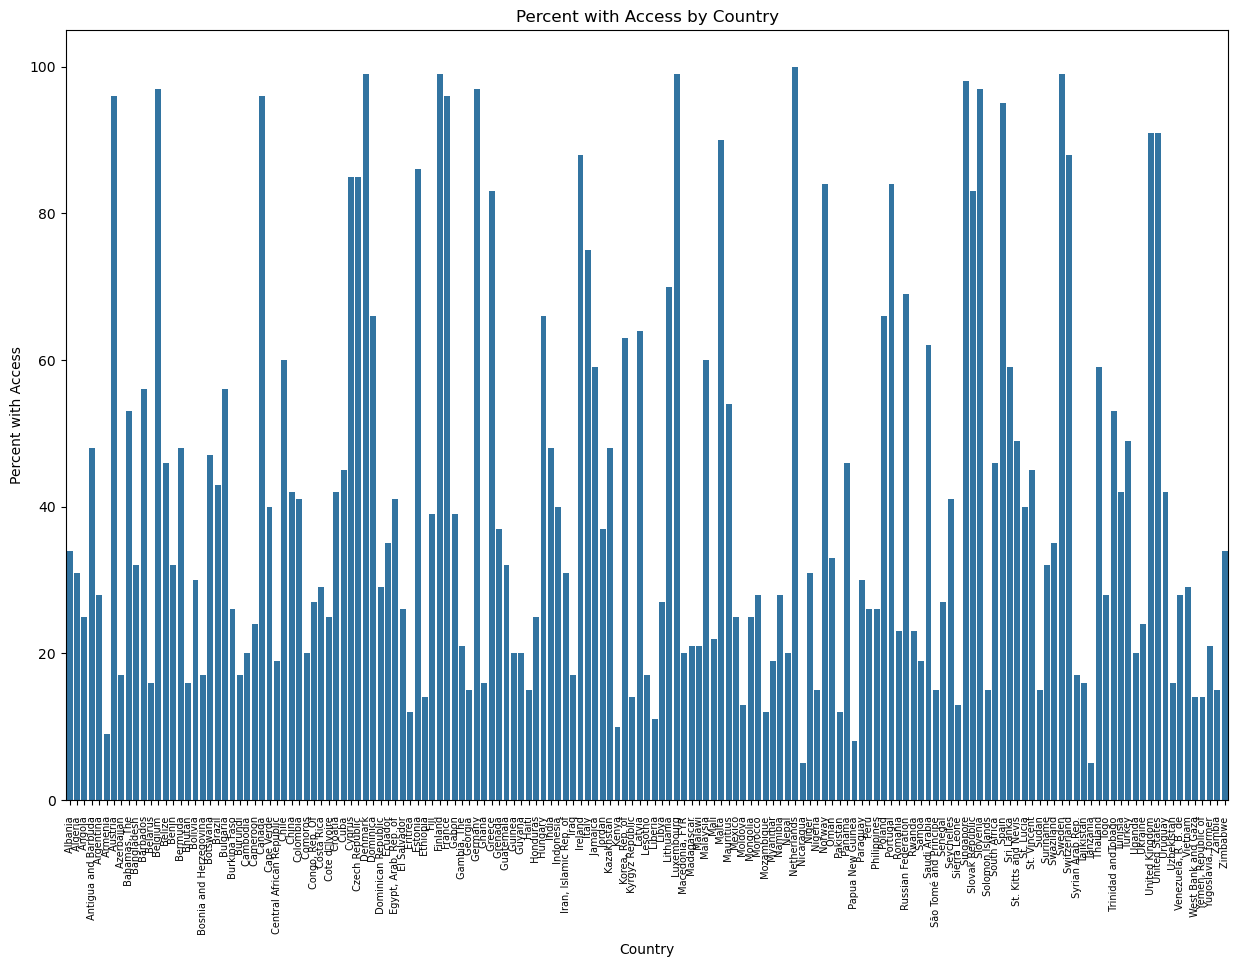

In [135]:
#Définir la taille de la figure
plt.figure(figsize=(15, 10))
#Créer un graphique à barres pour 'Percent with Access'
sns.barplot(x='Country', y='Percent with Access', data=df_access_finance)
plt.title('Percent with Access by Country')
plt.xlabel('Country')
plt.ylabel('Percent with Access')
plt.xticks(fontsize=7)
plt.xticks(rotation=90)
plt.show()

C:\Users\Razer_Dazer\AppData\Local\Temp\ipykernel_24580\3334472497.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='Percent with Access', data=sample_df, palette="Blues_d", dodge=False)


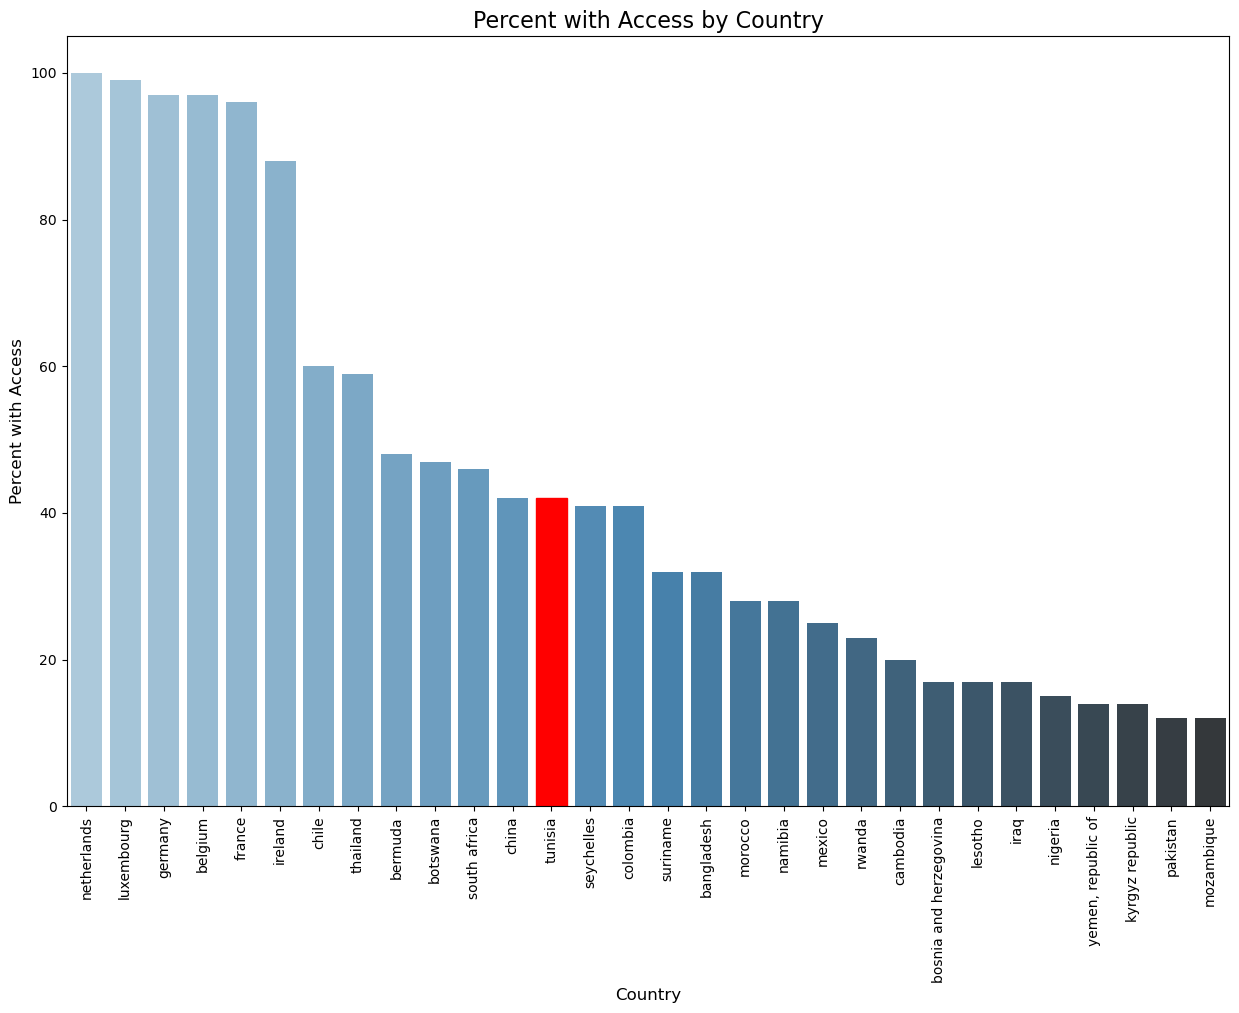

In [136]:
#Garantir une espacation et une casse cohérentes dans la colonne "Country"
df_access_finance['Country'] = df_access_finance['Country'].str.strip().str.lower()
#appliquer la même transformation aux autres pays et assurer une comparaison cohérente avec la Tunisie
tunisia = 'tunisia'
#Filtrer la Tunisie et échantillonner 29 autres pays
sample_df = df_access_finance[df_access_finance['Country'] == tunisia]  # Assurer que la Tunisie existe
other_countries = df_access_finance[df_access_finance['Country'] != tunisia].sample(29, random_state=42)
sample_df = pd.concat([sample_df, other_countries])
#Trier par "Percent with Access"
sample_df = sample_df.sort_values(by='Percent with Access', ascending=False)
#Définir la taille de la figure
plt.figure(figsize=(15, 10))
#Créer un graphique à barres pour "Percent with Access" pour l'échantillon
sns.barplot(x='Country', y='Percent with Access', data=sample_df, palette="Blues_d", dodge=False)
#Obtenir la liste des pays dans l'ordre où ils apparaissent dans le graphique
countries_in_plot = sample_df['Country'].tolist()
#Trouver l'indice de la Tunisie dans la liste des pays tracés
if tunisia in countries_in_plot:
    tunisia_index = countries_in_plot.index(tunisia)
    #Obtenir les barres dans le graphique
    bars = plt.gca().patches
    #Mettre l'importance sur la barre correspondant à la Tunisie
    bars[tunisia_index].set_color('red')
#Ajouter les titres et les étiquettes
plt.title('Percent with Access by Country', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Percent with Access', fontsize=12)
#Définir la taille de la police pour les étiquettes de l'axe des x et la rotation
plt.xticks(fontsize=10, rotation=90)
plt.show()


f. Analyser la corrélation entre deux variables (Percent with Access et Loan accounts per capita)

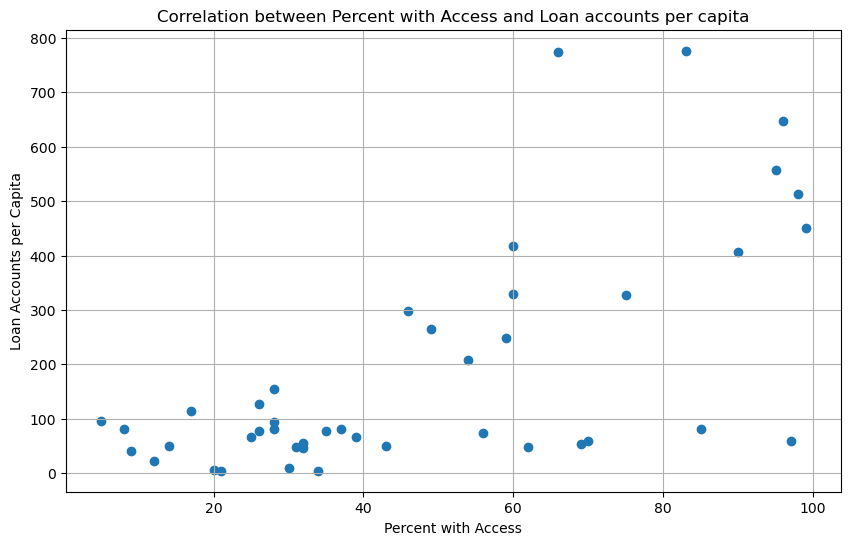

In [137]:
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['Percent with Access'], merged_df['Loan accounts per capita (number)'])
plt.title('Correlation between Percent with Access and Loan accounts per capita')
plt.xlabel('Percent with Access')
plt.ylabel('Loan Accounts per Capita')
plt.grid(True)
plt.show()

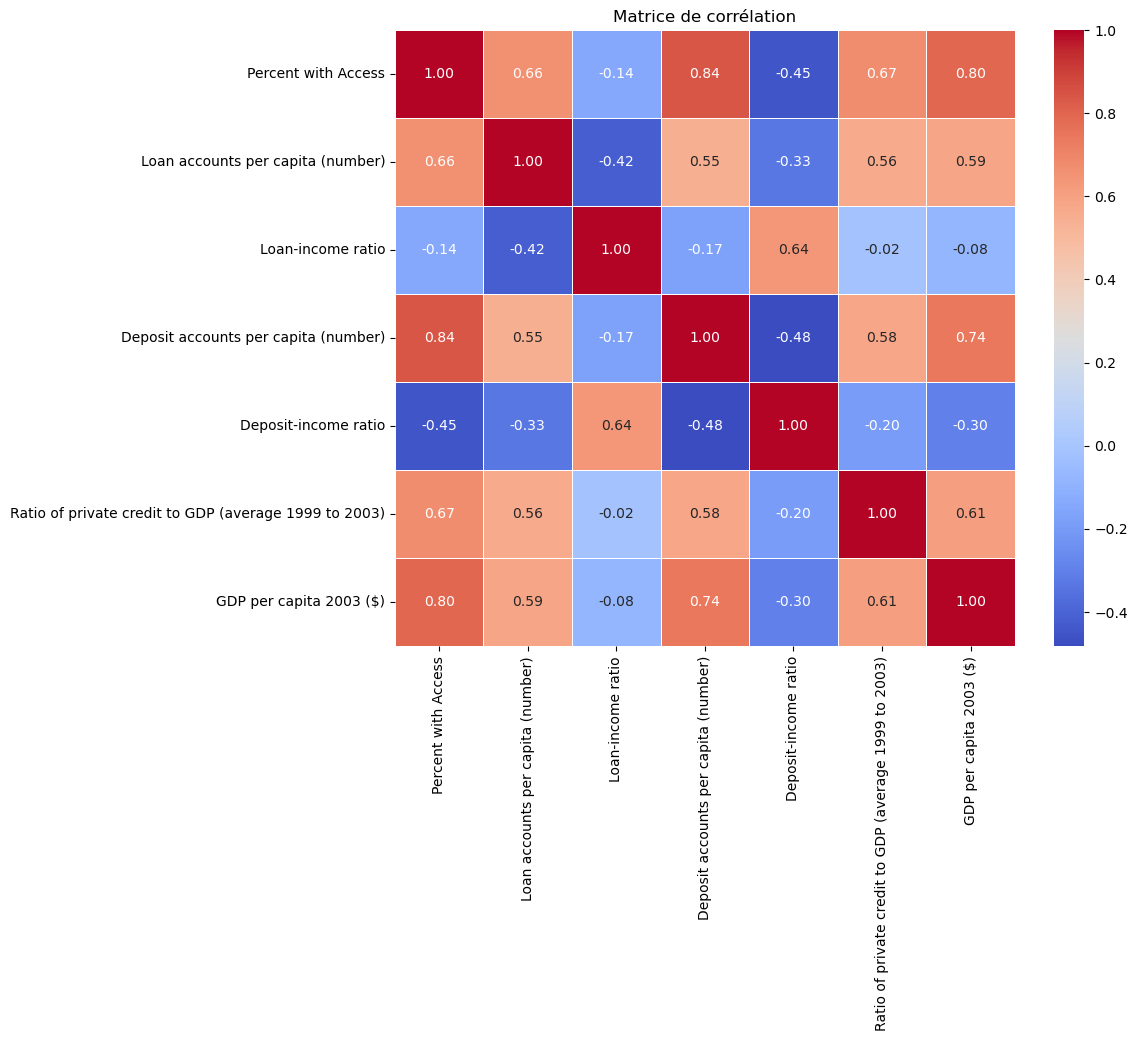

In [138]:
#Sélectionner uniquement les colonnes numériques
numeric_df = merged_df.select_dtypes(include=['number'])
#Calculer la matrice de corrélation
corr_matrix = numeric_df.corr()
#Définir la taille de la figure
plt.figure(figsize=(10, 8))
#Créer la heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice de corrélation')
plt.show()

In [139]:
dataLoan

,Country,Loan accounts per capita (number),Loan-income ratio,Deposit accounts per capita (number),Deposit-income ratio,Ratio of private credit to GDP (average 1999 to 2003),GDP per capita 2003 ($)
0,Albania,4.420,15.410,161.250,2.750,0.388,1933
1,Argentina,154.190,1.770,368.730,0.580,0.205,3381
2,Armenia,41.230,1.930,111.380,1.000,0.076,915
3,Austria,647.640,1.840,3119.950,0.260,1.025,31202
4,Bangladesh,54.730,5.220,228.750,1.600,0.245,376
5,Belgium,59.470,21.090,3080.310,0.380,0.773,29205
6,Bolivia,9.530,27.890,40.630,5.810,0.558,894
7,Bosnia and Herzegovina,114.090,3.190,429.400,1.870,0.388,1682
8,Brazil,49.590,6.180,630.860,0.400,0.346,2788
9,Bulgaria,73.850,4.240,1351.370,0.260,0.149,2538


### 3. Modélisation Prédiction :

a. Appliquer des modèles simples de prévision pour prédire le nombre de comptes de prêt par habitant (Loan accounts per capita (number)) en fonction de plusieurs caractéristiques économiques et financières (Vous pouvez implémenter une
régression linéaire)

In [140]:
#Assurer que 'dataLoan' est la DataFrame
#Définir les caractéristiques (features) et la variable cible (target) :
X = dataLoan[['Loan-income ratio', 'Deposit accounts per capita (number)',
              'Deposit-income ratio', 'Ratio of private credit to GDP (average 1999 to 2003)',
              'GDP per capita 2003 ($)']]
y = dataLoan['Loan accounts per capita (number)']
#Diviser les données en ensembles d'entraînement et de test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Standardiser les caractéristiques
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
#Initialiser les modèles
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=42),
}
#Entraîner et evaluer chaque modèle
for model_name, model in models.items():
    #Entraîner le modèle
    model.fit(X_train_scaled, y_train)
    #Prédire sur l'ensemble de test
    y_pred = model.predict(X_test_scaled)
    #Evaluer le modèle
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name}:")
    print(f"  Mean Squared Error: {mse:.2f}")
    print(f"  R-squared: {r2:.2f}")
    print()

Linear Regression:
  Mean Squared Error: 15758.93
  R-squared: 0.66

Random Forest Regressor:
  Mean Squared Error: 12040.45
  R-squared: 0.74



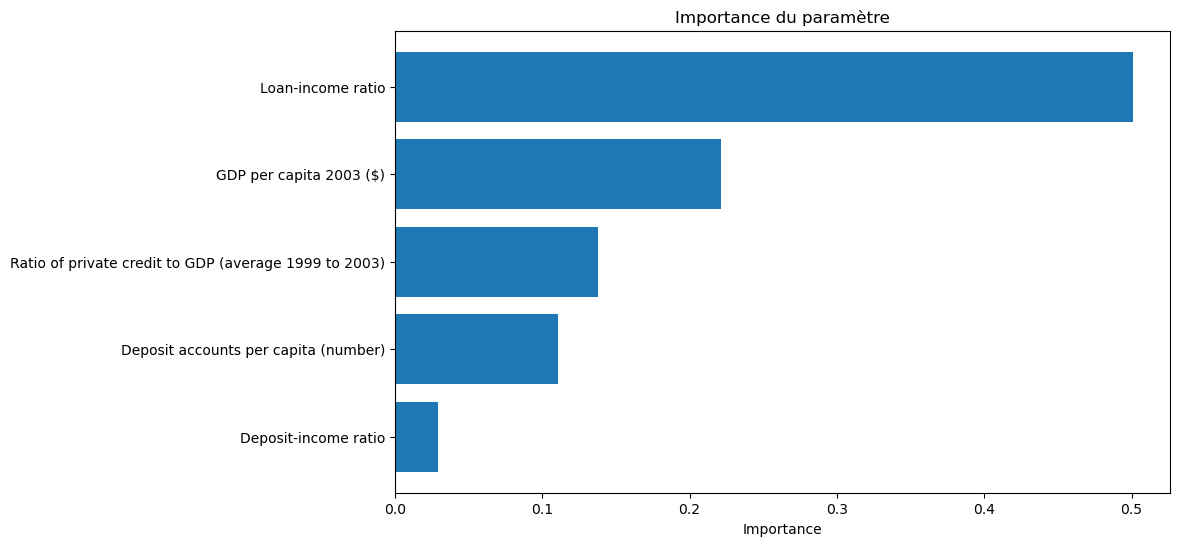

In [141]:
#Random Forest Regressor
importances = models['Random Forest Regressor'].feature_importances_
features = X.columns
indices = importances.argsort()
plt.figure(figsize=(10, 6))
plt.title('Importance du paramètre')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Importance')
plt.show()

b. Comparer les résultats en visualisant les prédictions par rapport aux valeurs réelles.

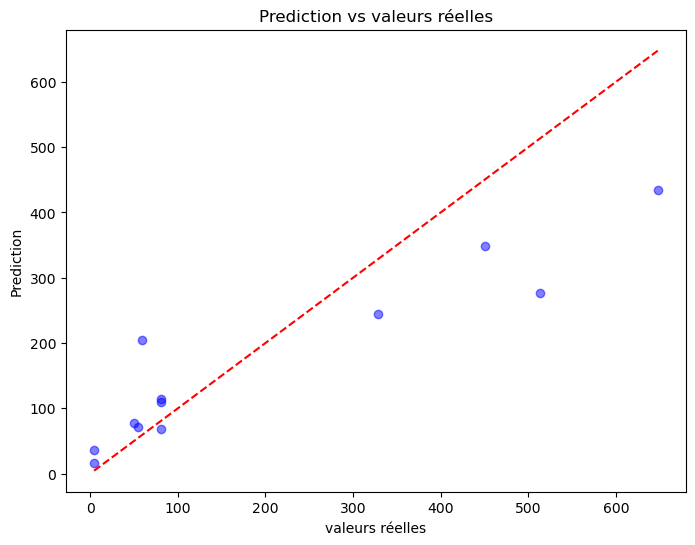

In [142]:
#Comparaison des résultats en visualisant les prédictions par rapport aux valeurs réelles.
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('valeurs réelles')
plt.ylabel('Prediction')
plt.title('Prediction vs valeurs réelles')
plt.show()

### Aide à la Décision

a.Calculer le ratio Loan to Deposit Ratio pour différents pays et par la suite  évaluer la liquidité d'une institution bancaire.

Le Loan to Deposit Ratio (LDR) est un indicateur clé de la performance et de la stabilité financière d'une banque. Il mesure la proportion des dépôts qu'une banque transforme en prêts. Ce ratio est utilisé pour évaluer la liquidité d'une institution bancaire.

In [143]:
nouveau_ratio = pd.DataFrame(dataLoan)
nouveau_ratio['LDR (Loan Deposit Ratio)'] = ((nouveau_ratio['Loan accounts per capita (number)'] )/(nouveau_ratio['Deposit accounts per capita (number)']))*100
nouveau_ratio

,Country,Loan accounts per capita (number),Loan-income ratio,Deposit accounts per capita (number),Deposit-income ratio,Ratio of private credit to GDP (average 1999 to 2003),GDP per capita 2003 ($),LDR (Loan Deposit Ratio)
0,Albania,4.420,15.410,161.250,2.750,0.388,1933,2.741085
1,Argentina,154.190,1.770,368.730,0.580,0.205,3381,41.816505
2,Armenia,41.230,1.930,111.380,1.000,0.076,915,37.017418
3,Austria,647.640,1.840,3119.950,0.260,1.025,31202,20.758025
4,Bangladesh,54.730,5.220,228.750,1.600,0.245,376,23.925683
5,Belgium,59.470,21.090,3080.310,0.380,0.773,29205,1.930650
6,Bolivia,9.530,27.890,40.630,5.810,0.558,894,23.455575
7,Bosnia and Herzegovina,114.090,3.190,429.400,1.870,0.388,1682,26.569632
8,Brazil,49.590,6.180,630.860,0.400,0.346,2788,7.860698
9,Bulgaria,73.850,4.240,1351.370,0.260,0.149,2538,5.464825


In [144]:
# Identification des niveaux de LDR
def classer_ldr(ldr):
    if ldr < 60:
        return 'Faible'
    elif 60 <= ldr <= 90:
        return 'Modéré'
    else:
        return 'Élevé'

#Application de la classification
nouveau_ratio['LDR Classification'] = nouveau_ratio['LDR (Loan Deposit Ratio)'].apply(classer_ldr)
#Filtrer les pays avec LDR élevé ou faible
pays_ldr_eleve = nouveau_ratio[nouveau_ratio['LDR Classification'] == 'Élevé']
pays_ldr_faible = nouveau_ratio[nouveau_ratio['LDR Classification'] == 'Faible']
#Afficher les résultats
print("Pays avec LDR élevé :")
display(pays_ldr_eleve[['Country', 'LDR (Loan Deposit Ratio)']])

print("\nPays avec LDR faible :")
display(pays_ldr_faible[['Country', 'LDR (Loan Deposit Ratio)']])


Pays avec LDR élevé :


,Country,LDR (Loan Deposit Ratio)
24,Israel,134.225777
27,Kenya,115.125750
36,Nicaragua,99.469413
43,Poland,146.321034



Pays avec LDR faible :


,Country,LDR (Loan Deposit Ratio)
0,Albania,2.741085
1,Argentina,41.816505
2,Armenia,37.017418
3,Austria,20.758025
4,Bangladesh,23.925683
5,Belgium,1.930650
6,Bolivia,23.455575
7,Bosnia and Herzegovina,26.569632
8,Brazil,7.860698
9,Bulgaria,5.464825


b. Implémenter une visualisation de la distribution des pays selon leur LDR

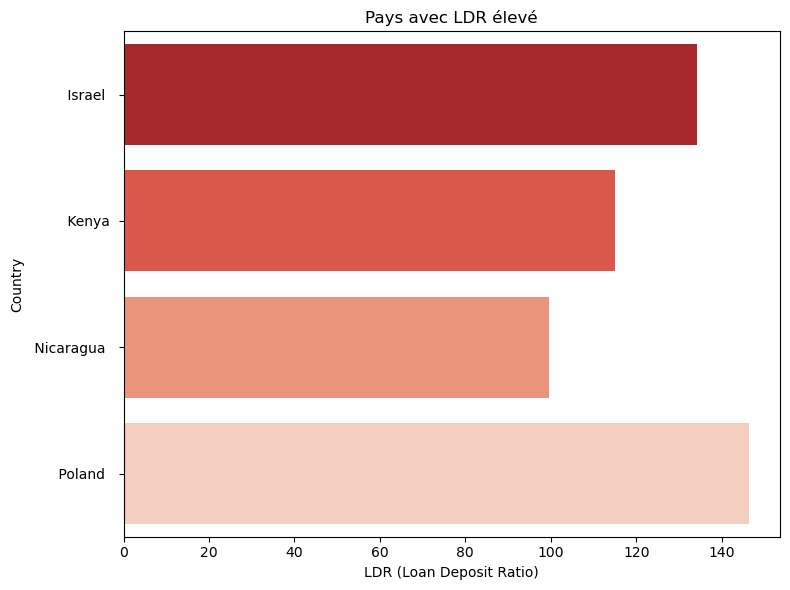

In [145]:
import seaborn as sns
import matplotlib.pyplot as plt

# Créer une figure avec un seul sous-graphe pour LDR élevé
fig, ax = plt.subplots(figsize=(8, 6))
#Barplot pour les pays avec LDR élevé
sns.barplot(x='LDR (Loan Deposit Ratio)', y='Country', data=pays_ldr_eleve, ax=ax, hue='Country', palette="Reds_r", legend=False)
ax.set_title("Pays avec LDR élevé")
#Ajuster les espacements et afficher
plt.tight_layout()
plt.show()



C:\Users\Razer_Dazer\AppData\Local\Temp\ipykernel_24580\1222936187.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='LDR (Loan Deposit Ratio)', y='Country', data=pays_ldr_min, ax=ax, palette="Blues_r")


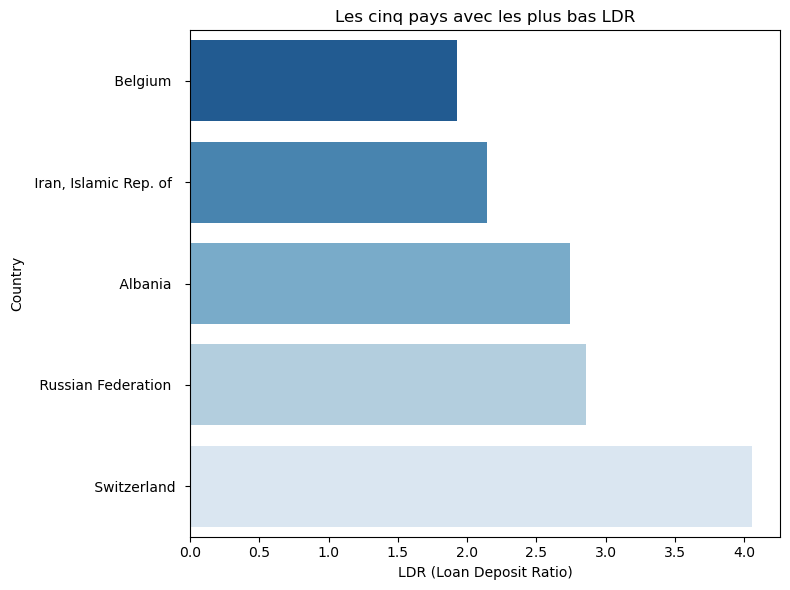

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt

#Trier le DataFrame en fonction du LDR et sélectionner les 5 pays avec les plus bas LDR
pays_ldr_min = nouveau_ratio.nsmallest(5, 'LDR (Loan Deposit Ratio)')
#Créer une figure avec un seul sous-graphe pour les 5 pays avec les plus bas LDR
fig, ax = plt.subplots(figsize=(8, 6))
#Barplot pour les 5 pays avec LDR minimum
sns.barplot(x='LDR (Loan Deposit Ratio)', y='Country', data=pays_ldr_min, ax=ax, palette="Blues_r")
ax.set_title("Les cinq pays avec les plus bas LDR")
#Ajuster les espacements et afficher
plt.tight_layout()
plt.show()


In [147]:
#Charger le fichier CSV avec le bon encodage
file_path = 'Data/Barriers_to_loan_services_consumer_and_mortgage_loans.csv'
dataBarriers = pd.read_csv(file_path, encoding='ISO-8859-1')
#Afficher le DataFrame nettoyé
dataBarriers


,Country,Number of banks responding,Loan market share (respondents share out of total system) 2004,Physical access_Locations to submit loan applications (out of 5),Affordability_Minimum amount consumer loan (% of GDPPC),Affordability_Fees consumer loan (% of min. loan amount),Affordability_Minimum amount mortgage loan (% of GDPPC),Affordability_Fee mortgage loan (% of min. loan amount),Eligibility_Days to process consumer loan applications,Eligibility_Days to process mortgage loan applications
0,Albania,5,64.24%,2.03,214.29,7.17,535.19,7.36,9.64,11.69
1,Argentina,2,19.89%,5.00,7.64,3.44,97.55,0.75,2,4.82
2,Armenia,4,47.28%,2.00,14.74,1.98,234.16,9.19,4.83,10.95
3,Australia,2,33.59%,5.00,7.31,0.52,41.12,0.8,1,2.59
4,Bangladesh,5,56.51%,2.12,25.7,0.23,1412.52,0.18,9.44,33.48
5,Belarus,3,71.63%,2.00,3.28,0.89,0,1.43,8.06,8.74
6,Belgium,3,68.57%,2.45,5.34,0,86.18,0.95,2.7,5.24
7,Bolivia,4,58.87%,2.74,109,3.45,1124.84,3.48,5.36,15.03
8,Bosnia and Herzegovina,4,58.96%,2.73,18.54,1.47,484.92,1.49,5.36,16.65
9,Brazil,4,48.61%,4.85,1.96,3.44,151.08,9.06,1,13.62


In [148]:
#Afficher les colonnes
print(dataBarriers.columns)
#Supprimer les espaces supplémentaires dans les noms de colonnes
dataBarriers.columns = dataBarriers.columns.str.strip()
for column in dataBarriers.columns[1:]:  # Skip the first column
    # supprimer les valeurs non numériques et les remplacer par une chaîne vide
    dataBarriers[column] = dataBarriers[column].replace(r'[^\d.]', '', regex=True)
    # convertir une colonne en type numérique tout en remplaçant les erreurs par des valeurs NaN
    dataBarriers[column] = pd.to_numeric(dataBarriers[column], errors='coerce')
    # remplir les valeurs NaN en utilisant la médiane
    dataBarriers[column] = dataBarriers[column].fillna(dataBarriers[column].median())
dataBarriers

Index(['Country', 'Number of banks responding  ',
       'Loan market share (respondents share out of total system) 2004',
       'Physical access_Locations to submit loan applications (out of 5)',
       'Affordability_Minimum amount consumer loan (% of GDPPC)',
       'Affordability_Fees consumer loan (% of min. loan amount)',
       'Affordability_Minimum amount mortgage loan (% of GDPPC)',
       'Affordability_Fee mortgage loan (% of min. loan amount)',
       'Eligibility_Days to process consumer loan applications',
       'Eligibility_Days to process mortgage loan applications'],
      dtype='object')


,Country,Number of banks responding,Loan market share (respondents share out of total system) 2004,Physical access_Locations to submit loan applications (out of 5),Affordability_Minimum amount consumer loan (% of GDPPC),Affordability_Fees consumer loan (% of min. loan amount),Affordability_Minimum amount mortgage loan (% of GDPPC),Affordability_Fee mortgage loan (% of min. loan amount),Eligibility_Days to process consumer loan applications,Eligibility_Days to process mortgage loan applications
0,Albania,5,64.24,2.03,214.29,7.17,535.190,7.36,9.64,11.69
1,Argentina,2,19.89,5.00,7.64,3.44,97.550,0.75,2.00,4.82
2,Armenia,4,47.28,2.00,14.74,1.98,234.160,9.19,4.83,10.95
3,Australia,2,33.59,5.00,7.31,0.52,41.120,0.80,1.00,2.59
4,Bangladesh,5,56.51,2.12,25.70,0.23,1412.520,0.18,9.44,33.48
5,Belarus,3,71.63,2.00,3.28,0.89,0.000,1.43,8.06,8.74
6,Belgium,3,68.57,2.45,5.34,0.00,86.180,0.95,2.70,5.24
7,Bolivia,4,58.87,2.74,109.00,3.45,1124.840,3.48,5.36,15.03
8,Bosnia and Herzegovina,4,58.96,2.73,18.54,1.47,484.920,1.49,5.36,16.65
9,Brazil,4,48.61,4.85,1.96,3.44,151.080,9.06,1.00,13.62


Créer un graphique pertinent pour visualiser la part du marché des prêts des banques en Tunisie

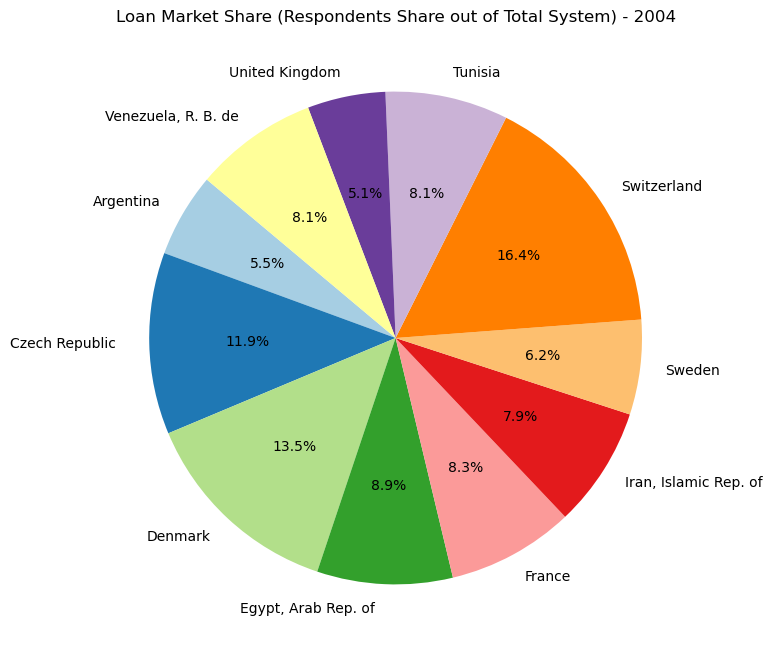

In [149]:
import random
tunisia_banks_responding = dataBarriers[dataBarriers['Country'] == 'Tunisia']['Number of banks responding'].values[0]
#Filtrer le dataframe pour les pays ayant le même nombre de banques répondantes que la Tunisie
filtered_countries = dataBarriers[dataBarriers['Number of banks responding'] == tunisia_banks_responding]
#Exclure la Tunisie de la sélection aléatoire
other_countries = filtered_countries[filtered_countries['Country'] != 'Tunisia']['Country'].unique()
#Sélectionner 10 pays au hasard dans la liste filtrée
random_countries = random.sample(list(other_countries), 10)
#Combiner la Tunisie avec les pays sélectionnés au hasard
selected_countries = ['Tunisia'] + random_countries
#Filtrer le dataframe pour ces pays sélectionnés
final_df = dataBarriers[dataBarriers['Country'].isin(selected_countries)]
#Extraire les noms des pays et les valeurs de la part de marché des prêts
labels = final_df['Country']
loan_market_share = final_df['Loan market share (respondents share out of total system) 2004']
#Tracer le graphique en secteurs
plt.figure(figsize=(8, 8))
plt.pie(loan_market_share, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Loan Market Share (Respondents Share out of Total System) - 2004')
plt.show()


Créer un graphique pertinent pour comparer l'accessibilité des prêts en Tunisie avec d'autres pays, en se basant sur un indicateur spécifique : le montant minimum du prêt à la consommation exprimé en pourcentage du PIB par habitant (GDPPC)

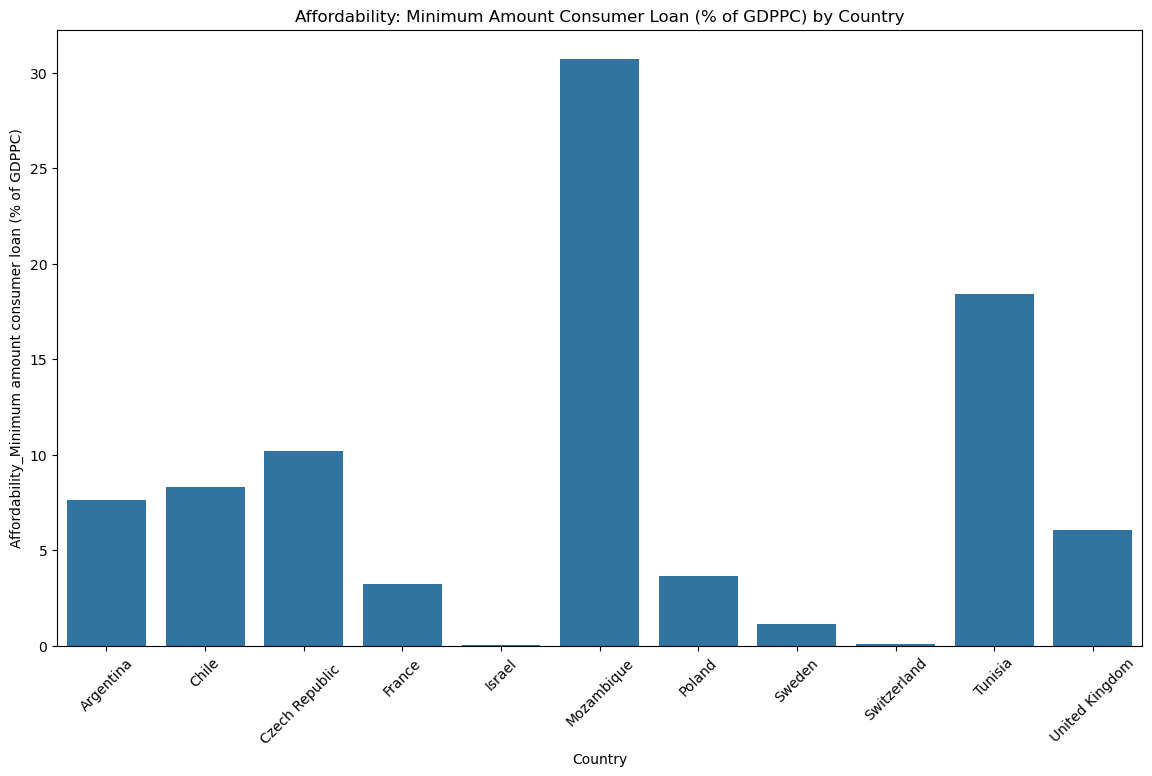

In [150]:
selected_countries = ['Tunisia'] + random.sample(list(other_countries), 10)
filtered_df = dataBarriers[dataBarriers['Country'].isin(selected_countries)]
#Tracer un graphique à barres pour les indicateurs d'accessibilité
plt.figure(figsize=(14, 8))
sns.barplot(x='Country', y='Affordability_Minimum amount consumer loan (% of GDPPC)', data=filtered_df)
plt.title('Affordability: Minimum Amount Consumer Loan (% of GDPPC) by Country')
plt.xticks(rotation=45)
plt.show()